# Matplotlib Homework - The Power of Plots

## Background

What good is data without a good plot to tell the story?

So, let's take what you've learned about Python Matplotlib and apply it to a real-world situation and dataset:

![Laboratory](../Instructions/Images/Laboratory.jpg)

While your data companions rushed off to jobs in finance and government, you remained adamant that science was the way for you. Staying true to your mission, you've joined Pymaceuticals Inc., a burgeoning pharmaceutical company based out of San Diego. Pymaceuticals specializes in anti-cancer pharmaceuticals. In its most recent efforts, it began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

As a senior data analyst at the company, you've been given access to the complete data from their most recent animal study. In this study, 249 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. You have been tasked by the executive team to generate all of the tables and figures needed for the technical report of the study. The executive team also has asked for a top-level summary of the study results.

## Instructions

Your tasks are to do the following:

* Before beginning the analysis, check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.

* Use the cleaned data for the remaining steps.

* Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.

* Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the total number of measurements taken for each treatment regimen throughout the course of the study.

  * **NOTE:** These plots should look identical.

* Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the distribution of female or male mice in the study.

  * **NOTE:** These plots should look identical.

* Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

* Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

  **Hint**: All four box plots should be within the same figure. Use this [Matplotlib documentation page](https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py) for help with changing the style of the outliers.

* Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.

* Generate a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen.

* Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.

* Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

Here are some final considerations:

* You must use proper labeling of your plots, to include properties such as: plot titles, axis labels, legend labels, _x_-axis and _y_-axis limits, etc.

* See the [starter workbook](data/pymaceuticals_starter.ipynb) for help on what modules to import and expected format of the notebook.

## Hints and Considerations

* Be warned: These are very challenging tasks. Be patient with yourself as you trudge through these problems. They will take time and there is no shame in fumbling along the way. Data visualization is equal parts exploration, equal parts resolution.

* You have been provided a starter notebook. Use the code comments as a reminder of steps to follow as you complete the assignment.

* Don't get bogged down in small details. Always focus on the big picture. If you can't figure out how to get a label to show up correctly, come back to it. Focus on getting the core skeleton of your notebook complete. You can always revisit old problems.

* While you are trying to complete this assignment, feel encouraged to constantly refer to Stack Overflow and the Pandas documentation. These are needed tools in every data analyst's tool belt.

* Remember, there are many ways to approach a data problem. The key is to break up your task into micro tasks. Try answering questions like:

  * How does my DataFrame need to be structured for me to have the right _x_-axis and _y_-axis?

  * How do I build a basic scatter plot?

  * How do I add a label to that scatter plot?

  * Where would the labels for that scatter plot come from?

  Again, don't let the magnitude of a programming task scare you off. Ultimately, every programming problem boils down to a handful of bite-sized tasks.

* Get help when you need it! There is never any shame in asking. But, as always, ask a _specific_ question. You'll never get a great answer to "I'm lost."

- - -

## References

Mockaroo, LLC. (2021). Realistic Data Generator. [https://www.mockaroo.com/](https://www.mockaroo.com/)

- - -

© 2021 Trilogy Education Services, LLC, a 2U, Inc. brand. Confidential and Proprietary. All Rights Reserved.

## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
combined_mouse_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
total_mice=combined_mouse_df["Mouse ID"].value_counts()
num_mice=len(total_mice)
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_df = combined_mouse_df[combined_mouse_df.duplicated(['Mouse ID','Timepoint'])]

duplicate_MouseId = duplicate_df["Mouse ID"].unique()
duplicate_MouseId

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_df = combined_mouse_df[combined_mouse_df.duplicated(['Mouse ID','Timepoint'],keep=False)]

duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combined_mouse_df

clean_data_df.drop(clean_data_df.loc[clean_data_df['Mouse ID']=='g989'].index, inplace=True)

In [6]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean=clean_data_df["Mouse ID"].value_counts()
num_mice_clean=len(total_mice_clean)
num_mice_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_regimen_groupby = clean_data_df.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_mean = drug_regimen_groupby["Tumor Volume (mm3)"].mean()
tumor_median = drug_regimen_groupby["Tumor Volume (mm3)"].median()
tumor_var = drug_regimen_groupby["Tumor Volume (mm3)"].var()
tumor_std = drug_regimen_groupby["Tumor Volume (mm3)"].std()
tumor_sem = drug_regimen_groupby["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary dataframe.
sum_stats_df = pd.DataFrame({"Tumor Mean":tumor_mean
                                    ,"Tumor Median":tumor_median
                                    ,"Tumor Variance":tumor_var
                                    ,"Tumor Std Dev": tumor_std
                                    ,"Tumor SEM":tumor_sem})
sum_stats_df

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Std Dev,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_sum_stats_df = clean_data_df.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]

agg_sum_stats_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

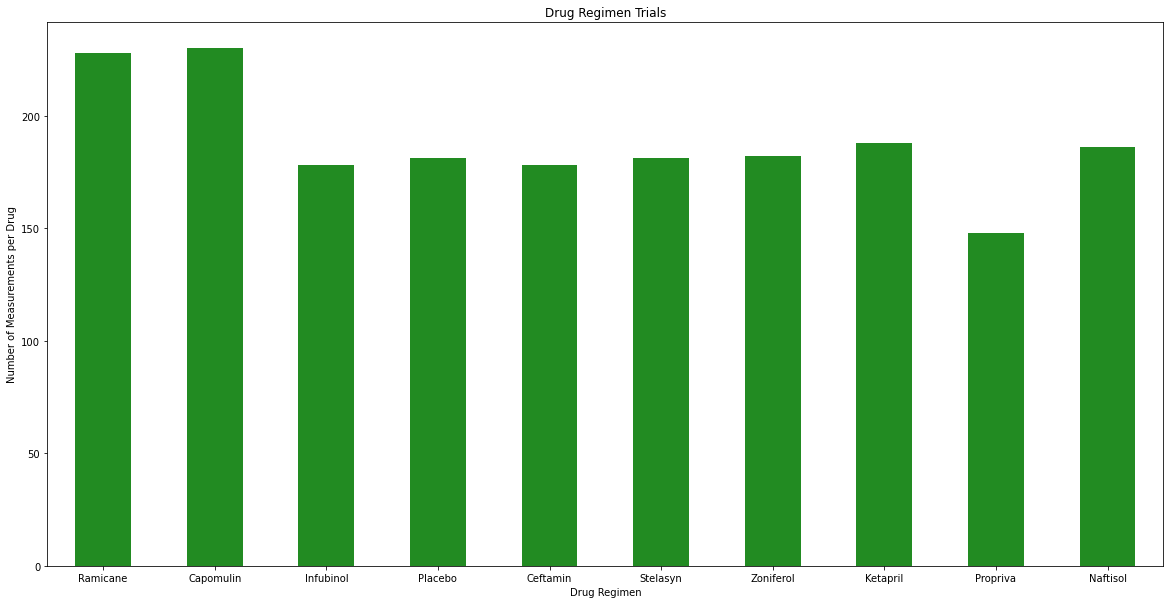

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
agg_sum_stats_df_copy = agg_sum_stats_df.copy()
drug_names=clean_data_df['Drug Regimen']

agg_sum_stats_df_copy['count'] = 0

drug_names_count = {}
for name in drug_names:
    if name not in drug_names_count:
        drug_names_count[name] = 0
    drug_names_count[name] = drug_names_count[name] + 1

#convert dictionary to panda dataframe
drug_names_count_df = pd.DataFrame(list(drug_names_count.items()),columns = ['Drug Regimen','Count'])


# bar plot 
drug_names_count_df.plot.bar(x='Drug Regimen',y='Count',rot=0,color='forestgreen',legend=False,figsize=(20,10))

# Give our chart some labels and a tile
plt.title("Drug Regimen Trials")
plt.ylabel("Number of Measurements per Drug")

# Sets the x limits
plt.xlim(-0.5, len(drug_names_count)-0.5)

plt.show()

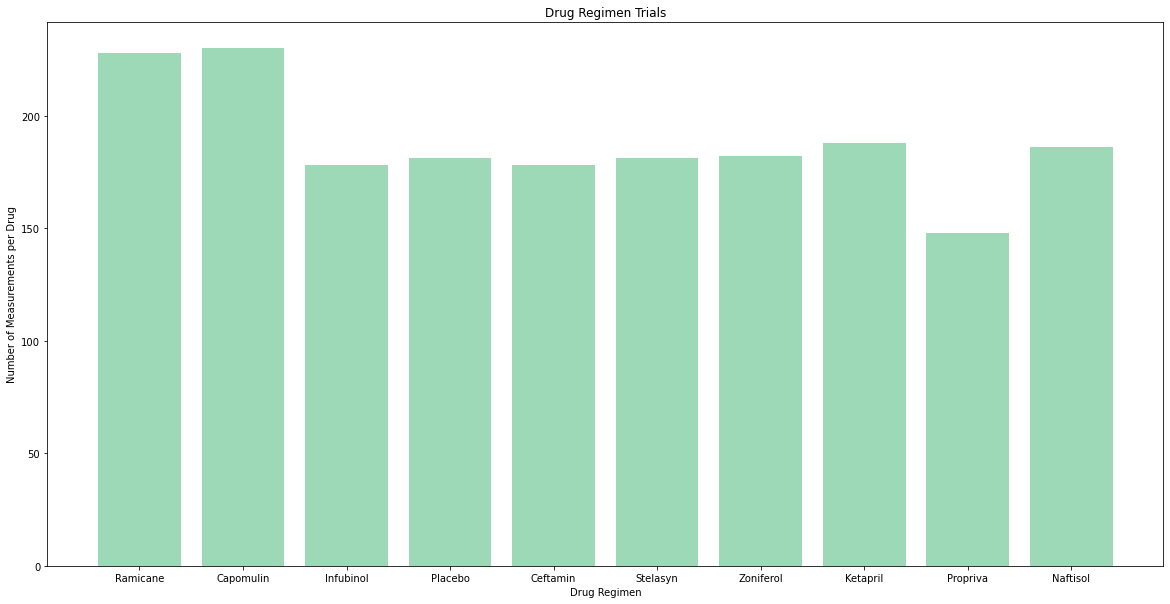

In [10]:

# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.figure(figsize=(20,10))
plt.bar(drug_names_count_df['Drug Regimen'], drug_names_count_df['Count'], color='mediumseagreen', alpha=0.5, align="center")

# Set a Title and labels
plt.title("Drug Regimen Trials")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements per Drug")

plt.show()

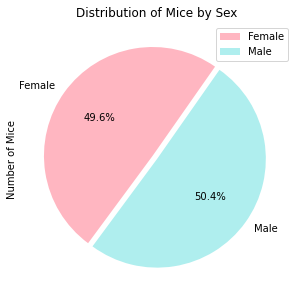

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_sex_group_data = clean_data_df.groupby(["Sex","Mouse ID"])
mouse_sex_df = pd.DataFrame(mouse_sex_group_data.size())

mouse_sex_count = pd.DataFrame(mouse_sex_df.groupby(["Sex"]).count())
mouse_sex_count.columns=["Number of Mice"]

pie_colors=["lightpink","paleturquoise"]
mouse_sex_pie = mouse_sex_count.plot.pie(y='Number of Mice', figsize=(5,5), colors = pie_colors, startangle=55, explode=(0.05,0), autopct="%1.1f%%")
plt.title("Distribution of Mice by Sex")
plt.show()

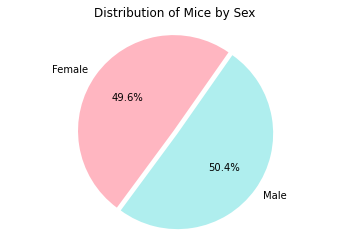

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_labels = ["Female","Male"]
distribution = [49.6, 50.4]

plt.pie(distribution, labels=sex_labels, colors= pie_colors, startangle=55, explode=(0.05,0), autopct="%1.1f%%" )
plt.title("Distribution of Mice by Sex")
plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Filter out all regimens except Capomulin, Ramicane, Infubinol, and Ceftamin
narrow_clean_df = clean_data_df[(clean_data_df['Drug Regimen'] != 'Placebo')
                              & (clean_data_df['Drug Regimen'] != 'Ketapril')
                              & (clean_data_df['Drug Regimen'] != 'Naftisol')
                              & (clean_data_df['Drug Regimen'] != 'Propriva')
                              & (clean_data_df['Drug Regimen'] != 'Stelasyn')
                              & (clean_data_df['Drug Regimen'] != 'Zoniferol')]

# Start by getting the last (greatest) timepoint for each mouse
mouse_final_timepoint = narrow_clean_df.groupby(['Mouse ID', 'Drug Regimen']).max()['Timepoint']
mouse_final_timepoint_df = pd.DataFrame(mouse_final_timepoint)
mouse_final_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_timepoint_volume_df = pd.merge(clean_data_df, mouse_final_timepoint, on=('Mouse ID', 'Timepoint'))
merged_timepoint_volume_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_values=[]

print(f'Tumor Volume (mm3) Summary')
print('-----------------------------------------------')
print('-----------------------------------------------')

for drug in treatments:
    
    tumor_volume = merged_timepoint_volume_df.loc[merged_timepoint_volume_df['Drug Regimen'] == drug]

    values = tumor_volume['Tumor Volume (mm3)']
    tumor_values.append(values)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(drug)
    print(f"*Median tumor volume (mm3): {round(quartiles[0.5],2)}")
    print(f"*Interquartile Range: {round(iqr, 2)}") 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"*Lower boundary for potential outliers: {round(lower_bound,2)}")
    print(f"*Upper boundary for potential outliers: {round(upper_bound,2)}")
    
    # Determine outliers using upper and lower bounds
    outliers_count = (values.loc[(tumor_volume['Tumor Volume (mm3)'] >= upper_bound) | 
                        (tumor_volume['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'*Number of {drug} outliers: {outliers_count}')
    
    
    print('-----------------------------------------------')
print('-----------------------------------------------')    

Tumor Volume (mm3) Summary
-----------------------------------------------
-----------------------------------------------
Capomulin
*Median tumor volume (mm3): 38.13
*Interquartile Range: 7.78
*Lower boundary for potential outliers: 20.7
*Upper boundary for potential outliers: 51.83
*Number of Capomulin outliers: 0
-----------------------------------------------
Ramicane
*Median tumor volume (mm3): 36.56
*Interquartile Range: 9.1
*Lower boundary for potential outliers: 17.91
*Upper boundary for potential outliers: 54.31
*Number of Ramicane outliers: 0
-----------------------------------------------
Infubinol
*Median tumor volume (mm3): 60.17
*Interquartile Range: 11.48
*Lower boundary for potential outliers: 36.83
*Upper boundary for potential outliers: 82.74
*Number of Infubinol outliers: 1
-----------------------------------------------
Ceftamin
*Median tumor volume (mm3): 59.85
*Interquartile Range: 15.58
*Lower boundary for potential outliers: 25.36
*Upper boundary for potential o

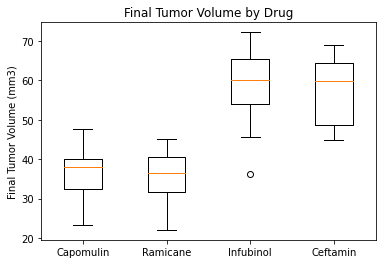

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
x_labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

plt.boxplot(tumor_values, labels=x_labels)
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

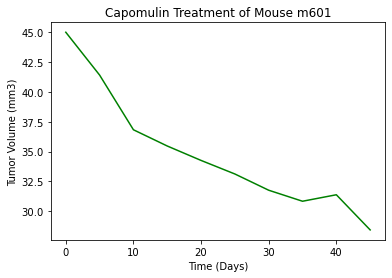

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Select a mouse

# Mouse chosen is m601, chosen at random and conveniently from merged_timepoint_volume_df.head() above
random_mouse = clean_data_df.loc[clean_data_df['Mouse ID'] == 'm601']

# Create plot
plt.plot(random_mouse['Timepoint'], random_mouse['Tumor Volume (mm3)'], color = 'g')

# Add plot details
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse m601")

plt.show()

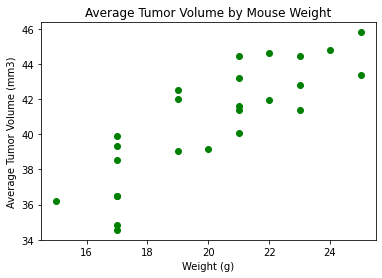

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_data = clean_data_df.loc[clean_data_df['Drug Regimen'] == 'Capomulin']

avg_volume_cap = pd.DataFrame(capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Avg Tumor Volume'})

avg_volume_cap = pd.merge(capomulin_data, avg_volume_cap, on='Mouse ID')
total_avg_volume = avg_volume_cap[['Weight (g)', 'Avg Tumor Volume']].drop_duplicates()
total_avg_volume

x = total_avg_volume['Weight (g)']
y = total_avg_volume['Avg Tumor Volume']

#plot 
plt.scatter(x, y, color = 'g')

# Add the labels and title to axes
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Mouse Weight')
# Display plot
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
